### 1. Data Analysis with Python (Pandas & Matplotlib)



This data surce comes from  https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

###  2. Data Collection and Loading 
*loading data and basic information about datafile that gives you the info of file.*

In [302]:
import pandas as pd
data = pd.read_csv(r"C:\Users\onlin\Documents\project\Python_Data_Analysis/sales_data.csv",encoding='latin1' )
print(data.head())
import matplotlib.pyplot as plt
import seaborn as sns
print("\nBasic Information about the dataset:")
print(data.info())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

### 3. Data Cleaning and Preparation 
   *Handle Missing Values: Empty cell or Missing Values*


In [303]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


###  Feature Engineering:  

*Convert columns from plane value to $ sign.*

In [305]:
data['PRICEEACH'] = data['PRICEEACH'].apply(lambda x: f"${x}")
print (data['PRICEEACH'].head())

0     $95.7
1    $81.35
2    $94.74
3    $83.26
4    $100.0
Name: PRICEEACH, dtype: object


*Classifying Price High and low with new column "ANALYSIS".*

In [306]:
data['ANALYSIS'] = data['SALES'].apply(lambda x: 'High' if x > 3000 else 'Low')
print(data[['COUNTRY', 'ANALYSIS']].head())

  COUNTRY ANALYSIS
0     USA      Low
1  France      Low
2  France     High
3     USA     High
4     USA     High


### 4. Exploratory Data Analysis (EDA) 
*Descriptive Statistics: Provide summary statistics (mean, median, min, max) for numerical columns.*

In [307]:
price_classification = data['ANALYSIS'].value_counts()
print("\nPrice Classification Counts:")
print(price_classification)


Price Classification Counts:
ANALYSIS
High    1541
Low     1282
Name: count, dtype: int64


Data Visualizations: Bar chart

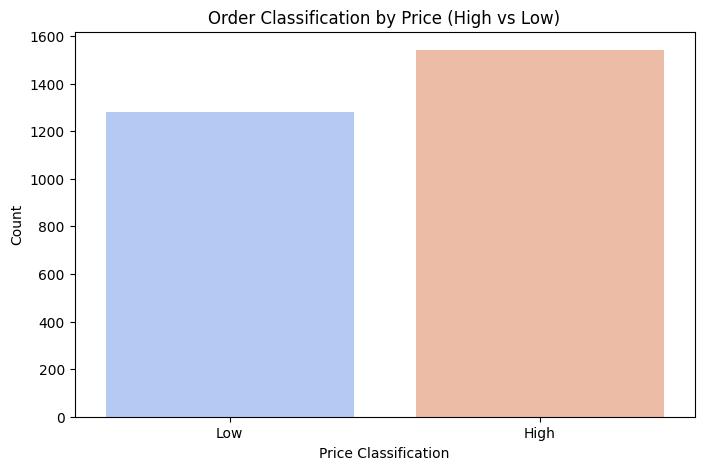

In [308]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='ANALYSIS', hue='ANALYSIS', palette="coolwarm")
plt.title("Order Classification by Price (High vs Low)")
plt.xlabel("Price Classification")
plt.ylabel("Count")
plt.show()


Data filter for Sweet Order

In [309]:
sweet_order= data[(data['SALES'] >= 500) & (data['SALES'] <= 700)]
max_sales = sweet_order['SALES']
sweet_order_order = sweet_order[sweet_order['SALES'] == max_sales]
sweet_order_order = sweet_order[['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'STATE', 'SALES']]
print("Sweet Order(s):")
print(sweet_order_order)

Sweet Order(s):
      ORDERNUMBER  QUANTITYORDERED PRICEEACH  STATE   SALES
1287        10407                6    $90.19     CA  541.14
1548        10214               20    $34.19    NaN  683.80
1551        10280               20    $28.88    NaN  577.60
1553        10304               23     $30.2    NaN  694.60
1818        10419               15    $42.67    NaN  640.05
2044        10408               15    $36.93  Tokyo  553.95
2045        10420               15    $43.49    NSW  652.35
2209        10264               20    $32.59     MA  651.80


Bar chart for Sweet Orders

<Figure size 1000x600 with 0 Axes>

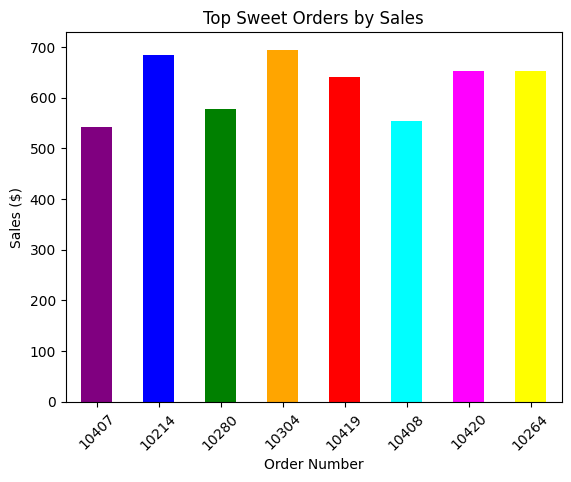

In [310]:
import matplotlib.pyplot as plt
sweet_order_order = sweet_order[['ORDERNUMBER', 'SALES']]
colors = ['purple', 'blue', 'green', 'orange', 'red', 'cyan', 'magenta', 'yellow']
plt.figure(figsize=(10, 6))
sweet_order_order.plot(
    x='ORDERNUMBER', 
    y='SALES', 
    kind='bar', 
    color=colors, 
    legend=False
)
plt.title("Top Sweet Orders by Sales")
plt.xlabel("Order Number")
plt.ylabel("Sales ($)")
plt.xticks(rotation=45)
plt.show()


### 5. Analysis and Insights
**Most common Productline**

In [311]:
most_common_PRODUCTLINE = data['PRODUCTLINE'].value_counts().idxmax()
most_common_PRODUCTLINE_count = data['PRODUCTLINE'].value_counts().max()
print(f"\nMost Common  PRODUCTLINE: {most_common_PRODUCTLINE} ({most_common_PRODUCTLINE_count} entries)")


Most Common  PRODUCTLINE: Classic Cars (967 entries)


**Highest average price**

In [312]:
highest_avg_price_PRICEEACH = avg_price_by_PRICEEACH .idxmax()
highest_avg_price = avg_price_by_PRICEEACH .max()
print(f"PRICEEACH  with Highest Average Price: {highest_avg_price_PRICEEACH } (${highest_avg_price:.2f})")

PRICEEACH  with Highest Average Price: 100.0 ($100.00)


### 6. Present the main conclusions drawn from the analysis. also recommendations. 
        Recommendations based on analysis

=== Main Conclusions ===

1. Sales Analysis (High vs Low):
ANALYSIS
High    1541
Low     1282
Name: count, dtype: int64

2. Number of Sweet Orders (Sales between $500 and $700): 8

3. Sweet Order with Maximum Sales:
      ORDERNUMBER   SALES
1287        10407  541.14
1548        10214  683.80
1551        10280  577.60
1553        10304  694.60
1818        10419  640.05
2044        10408  553.95
2045        10420  652.35
2209        10264  651.80

4. PRICEEACH with Highest Average Sales: $92.95 ($6134.70)

=== Recommendations ===
1. Focus marketing efforts on products contributing to 'High' sales to maximize revenue.
2. Investigate and promote the 'sweet spot' for orders with sales between $500 and $700.
3. Consider introducing dynamic pricing strategies to further capitalize on high-demand products.
4. Review states or regions with consistently high sales to identify growth opportunities.
5. Perform additional analysis on customer behavior and seasonal trends to optimize inventory.


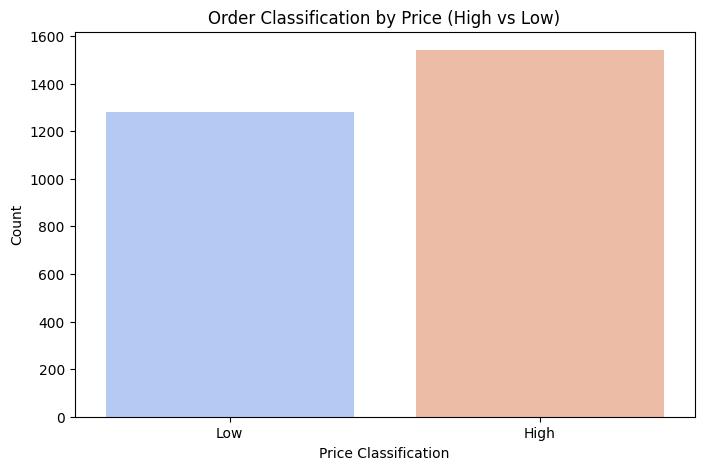

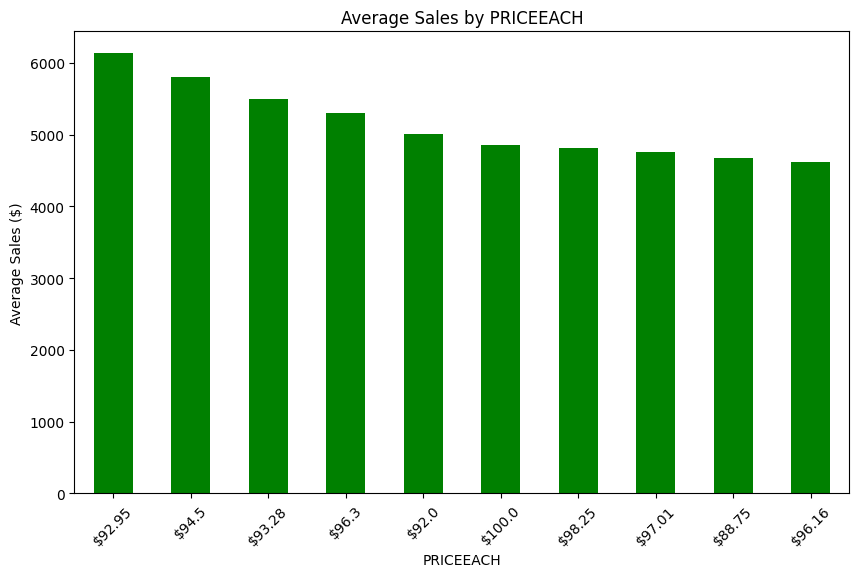

In [313]:

print("=== Main Conclusions ===")
high_low_sales_count = data['ANALYSIS'].value_counts()
print("\n1. Sales Analysis (High vs Low):")
print(high_low_sales_count)
sweet_order_count = sweet_order.shape[0]
print(f"\n2. Number of Sweet Orders (Sales between $500 and $700): {sweet_order_count}")
if not sweet_order_order.empty:
    print("\n3. Sweet Order with Maximum Sales:")
    print(sweet_order_order)
else:
    print("\n3. No Sweet Orders with Maximum Sales found.")
avg_price_by_price_each = data.groupby('PRICEEACH')['SALES'].mean()
highest_avg_price_price_each = avg_price_by_price_each.idxmax()
highest_avg_price = avg_price_by_price_each.max()
print(f"\n4. PRICEEACH with Highest Average Sales: {highest_avg_price_price_each} (${highest_avg_price:.2f})")
print("\n=== Recommendations ===")
print("1. Focus marketing efforts on products contributing to 'High' sales to maximize revenue.")
print("2. Investigate and promote the 'sweet spot' for orders with sales between $500 and $700.")
print("3. Consider introducing dynamic pricing strategies to further capitalize on high-demand products.")
print("4. Review states or regions with consistently high sales to identify growth opportunities.")
print("5. Perform additional analysis on customer behavior and seasonal trends to optimize inventory.")
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='ANALYSIS', hue='ANALYSIS', palette="coolwarm")
plt.title("Order Classification by Price (High vs Low)")
plt.xlabel("Price Classification")
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(10, 6))
avg_price_by_price_each.sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title("Average Sales by PRICEEACH")
plt.xlabel("PRICEEACH")
plt.ylabel("Average Sales ($)")
plt.xticks(rotation=45)
plt.show()
